In [15]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils import data
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8*1.61803, 8.0) # set default size of plots
plt.rcParams.update({'font.size': 18})
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [16]:
torch.manual_seed(7) 

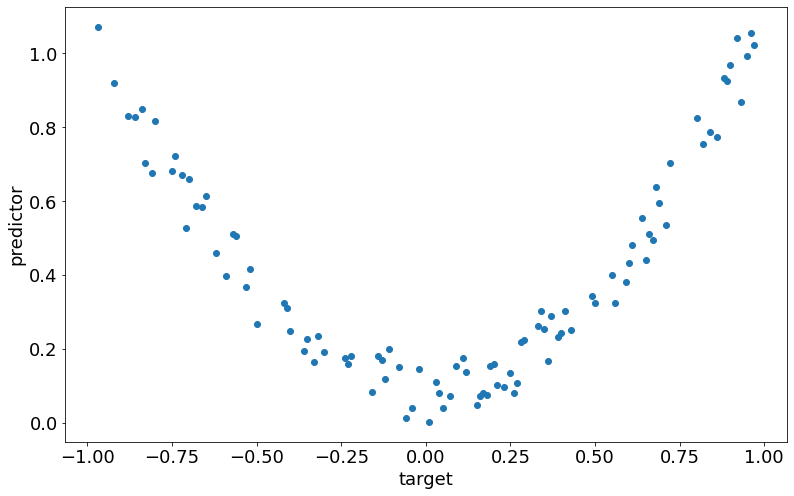

In [17]:
# First generate a space of points 
x = torch.linspace(-1, 1, 201).unsqueeze(-1)
# Learn a quadratic function...
y = x**2 
# ... with some noise
y = y + 0.2 * torch.rand(x.size())                 

# now split 50/50 into a training/testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

plt.scatter(x_train, y_train)
plt.xlabel("target")
plt.ylabel("predictor")
plt.show()

In [18]:
class SimpleNeuralNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(SimpleNeuralNet, self).__init__()
        # one hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  
        # one output layer
        self.output = torch.nn.Linear(n_hidden, n_output)  
        # use a Relu activation in the middle
        self.act = torch.nn.ReLU()

    def forward(self, x):
        # apply our hidden layer
        x = self.hidden(x)
        # apply a nonlinearity
        x = self.act(x)
        # now apply an output layer (no nonlinearity)
        x = self.output(x)           
        return x

In [19]:
# 1-output, 15-hidden
net = SimpleNeuralNet(n_feature=1, n_hidden=15, n_output=1)     
# print network architecture
print(net)  

# set up a very simple optimizer and loss function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

SimpleNeuralNet(
  (hidden): Linear(in_features=1, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
  (act): ReLU()
)


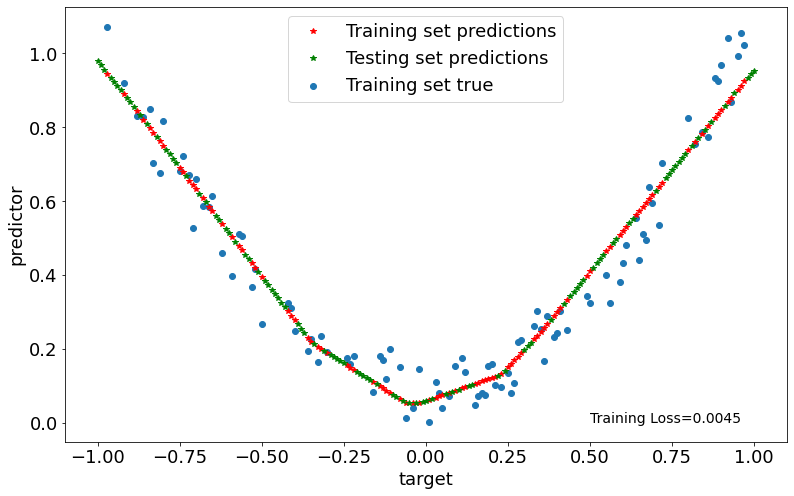

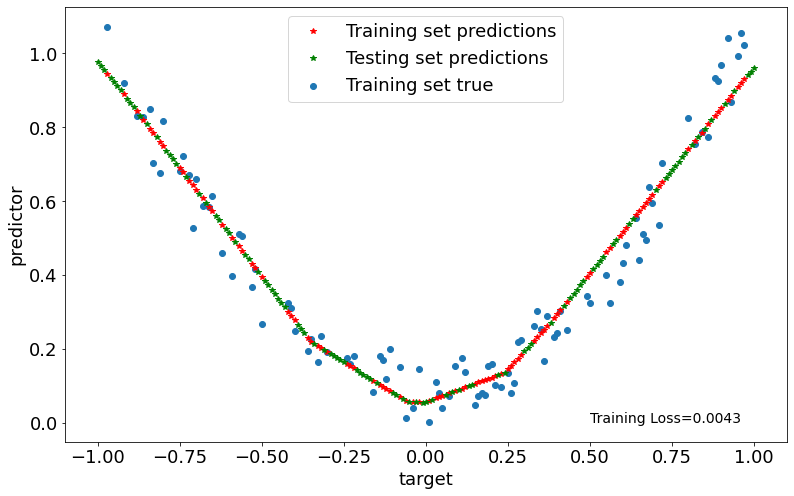

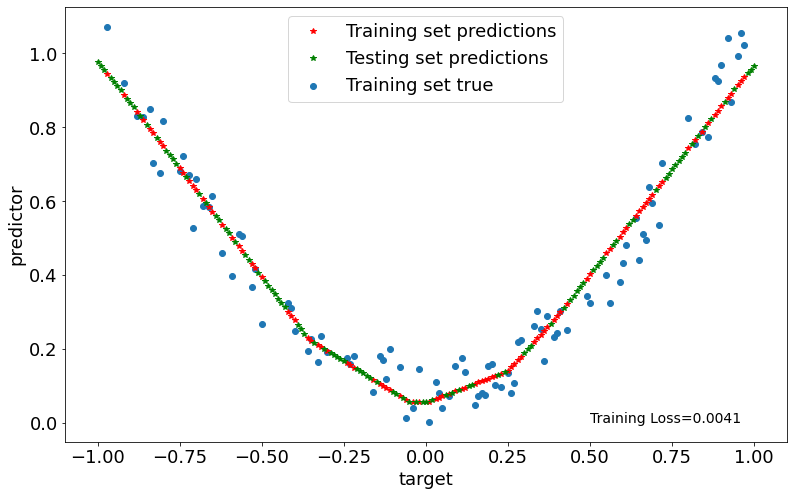

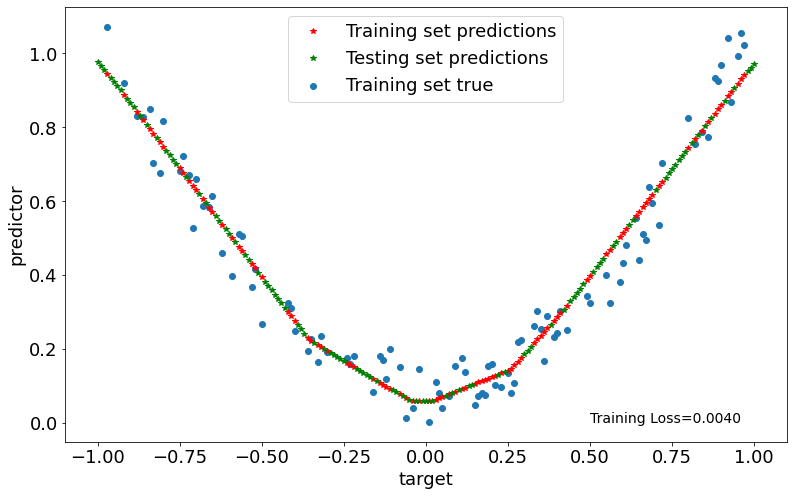

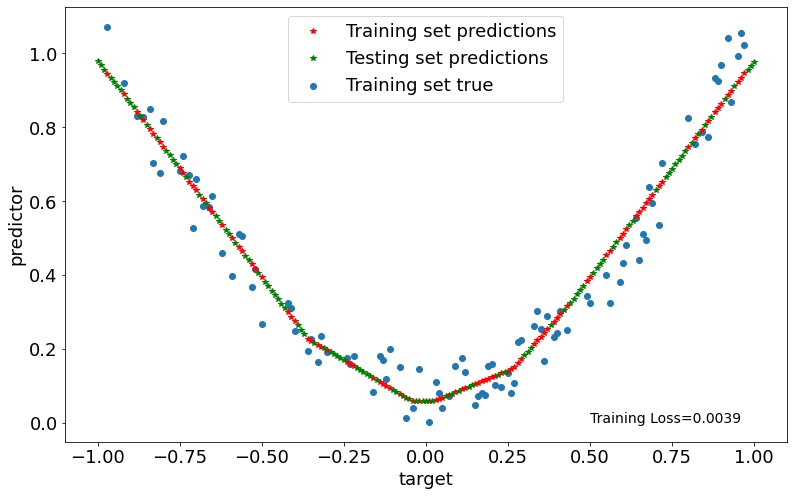

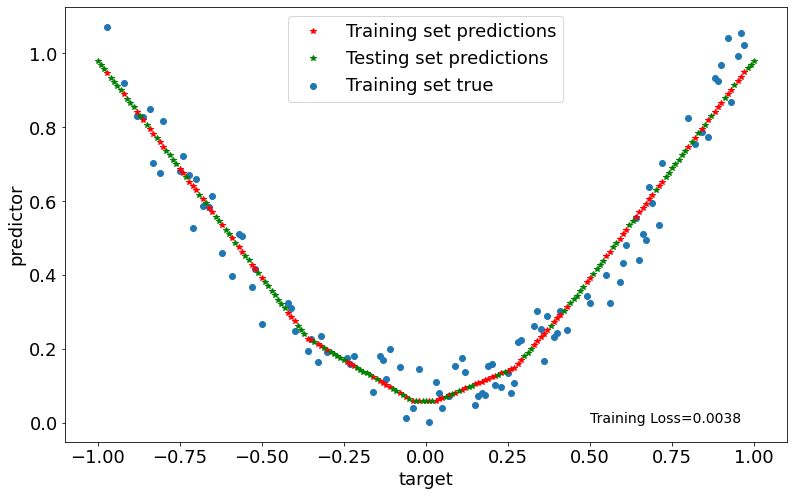

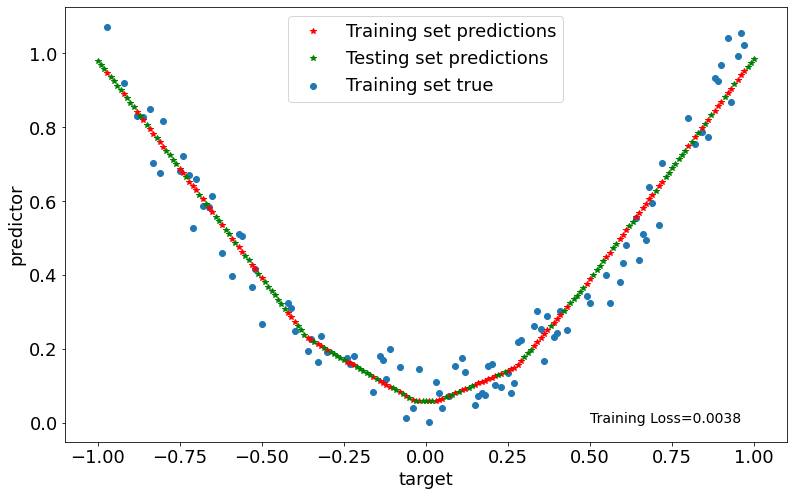

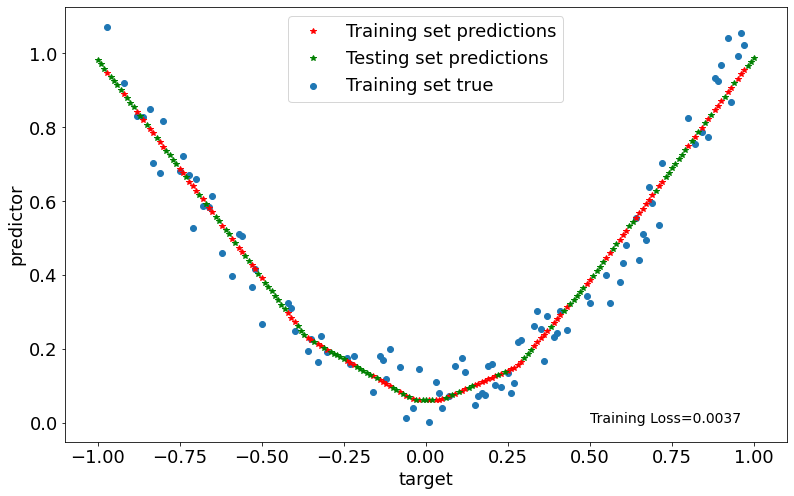

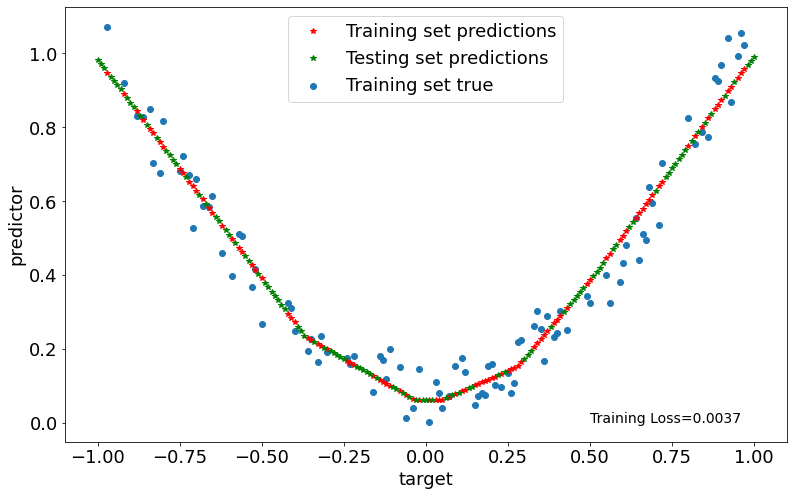

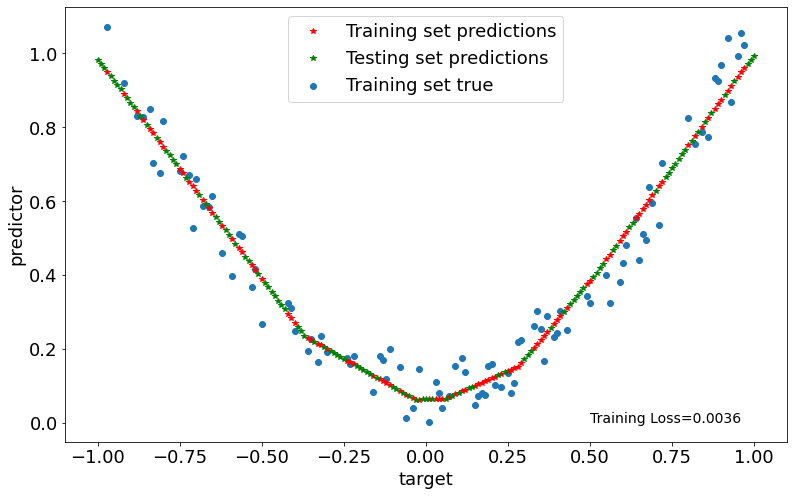

In [21]:
plt.ion()   # keep building up plots
for t in range(200):
    # pass the training set through our NN
    prediction = net(x_train)     

    # how well did we do?
    loss = loss_func(prediction, y_train)     

    # clear gradients for next train
    optimizer.zero_grad()   
    
    # backpropagation, compute gradients
    loss.backward()         
    
    # apply those gradients using our SGD update rule
    optimizer.step()        

    # now test our network
    y_test_pred = net(x_test).detach()
    
    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x_train, y_train, label='Training set true')
        plt.plot(x_train, prediction.detach(), 'r*', lw=5, label='Training set predictions')
        plt.plot(x_test, y_test_pred, 'g*', lw=1, label='Testing set predictions')
        plt.text(0.5, 0, 'Training Loss=%.4f' % loss.item(), fontdict={'size': 14, 'color':  'k'})
        plt.legend()
        plt.xlabel("target")
        plt.ylabel("predictor")
        plt.show()
        plt.pause(0.1)
        
plt.ioff()